In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor


import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# 선형 회귀분석모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인
from statsmodels.api import qqplot

In [2]:
matplotlib.rc('font',family='NanumGothic ECO')
matplotlib.rc('axes',unicode_minus=False)

%matplotlib inline

In [39]:
Car_raw = pd.read_csv("/home/piai/28기 임채훈/01 실습파일/2. Big Data 분석/Preprocessed_Car.csv")
Car_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2


In [40]:
Car_raw.drop(['Name'], axis=1, inplace=True)

In [41]:
Car_raw.drop(['Model'], axis=1, inplace=True)

In [42]:
Car_raw

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Kilometer_Range_Grade
0,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,4
1,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,5
2,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,4
3,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,2
4,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,5
7071,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,6
7072,Bangalore,16847.23,2016,70000,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,4
7073,Kochi,36254.50,2014,89230,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,5


In [43]:
car_raw_dummy = pd.get_dummies(Car_raw)

In [44]:
print(car_raw_dummy)

         Price  Year  Kilometers_Driven  Mileage  Engine  Power  Seats  \
0      2069.50  2003              80000    12.80  1489.0   35.5    5.0   
1     26918.78  2014              84004    20.38  1968.0  143.0    5.0   
2     25293.84  2014              79271    20.38  1968.0  143.0    5.0   
3     29509.48  2016              20003    20.38  1968.0  143.0    5.0   
4     28972.94  2016              39000    20.38  1968.0  143.0    5.0   
...        ...   ...                ...      ...     ...    ...    ...   
7070  26336.25  2014              86925    11.20  2400.0  215.0    5.0   
7071  36147.20  2014             102001    11.10  2400.0  200.0    7.0   
7072  16847.23  2016              70000    11.10  2400.0  200.0    7.0   
7073  36254.50  2014              89230    11.10  2400.0  200.0    7.0   
7074  30659.20  2014              22230    11.10  2400.0  200.0    7.0   

      Kilometer_Range_Grade  Location_Ahmedabad  Location_Bangalore  ...  \
0                         4        

In [45]:
car_raw_y = car_raw_dummy["Price"]
car_raw_x = car_raw_dummy.drop("Price", axis = 1, inplace = False)
car_train_x, car_test_x, car_train_y, car_test_y = train_test_split(car_raw_x, car_raw_y
                                                                , test_size = 0.3, random_state = 1234) 

In [46]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(car_train_x, car_train_y)
print("Score on training set: {:.3f}".format(gb_uncustomized.score (car_train_x, car_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score (car_test_x, car_test_y)))

Score on training set: 0.907
Score on test set: 0.888


훈련 세트의 설명력은 약 91.6%로 모델이 훈련 데이터의 변동을 잘 설명함
\
테스트 세트는 88.5%의 설명력으로 모델이 훈련에 사용되지 않은 새로운 데이터에 대해서도 상당히 높은 수준의 성능을 유지한다고 보임
\
훈련 점수와 테스트 점수 간 차이가 크지 않아 과적합이 크지 않은 것으로 보임.
\
일반화 능력이 좋은 모델이라고 볼 수 있음.

In [47]:
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## 모델 생성

In [54]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경(10~100)
para_n_tree = [n_tree * 10 for n_tree in range(10, 31)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(car_train_x, car_train_y)
    train_score.append(gb.score(car_train_x, car_train_y))
    test_score.append(gb.score(car_test_x, car_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,100,0.907,0.888
1,110,0.911,0.889
2,120,0.915,0.889
3,130,0.918,0.889
4,140,0.920,0.889
5,150,0.923,0.889
6,160,0.925,0.889
7,170,0.927,0.889
8,180,0.928,0.890
9,190,0.930,0.890


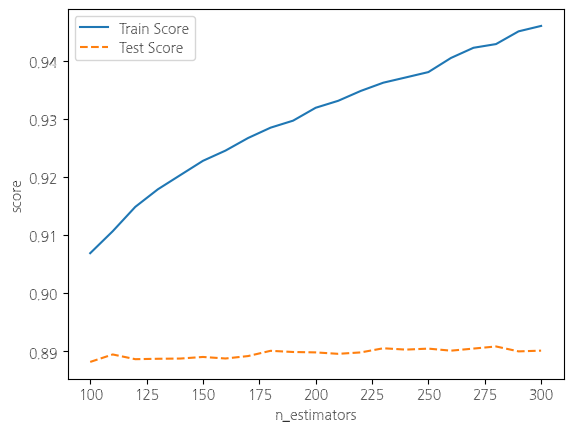

In [55]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()
plt.show()

테스트 점수가 일정하게 유지되는 지점에서 훈련점수만 계속 증가하고 있으며 과적합이 발생할 가능성이 높다.
\
과적합을 피하기 위해 150-200 사이에서 최적의 값을 선택하는 것이 좋다고 판단됨
\
그러므로, 180지점에서 테스트 점수가 비교적 높으므로 180을 선택

## min_sample_leaf수 변경에 따른 모델 성능

In [56]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(7, 141, 7)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 180,
                                   min_samples_leaf = v_min_samples_leaf)
    gb.fit(car_train_x, car_train_y)
    train_score.append(gb.score(car_train_x, car_train_y))
    test_score.append(gb.score(car_test_x, car_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,7,0.914,0.897
1,14,0.899,0.894
2,21,0.888,0.890
3,28,0.880,0.881
4,35,0.874,0.882
5,42,0.870,0.872
6,49,0.869,0.874
7,56,0.869,0.875
8,63,0.861,0.869
9,70,0.860,0.866


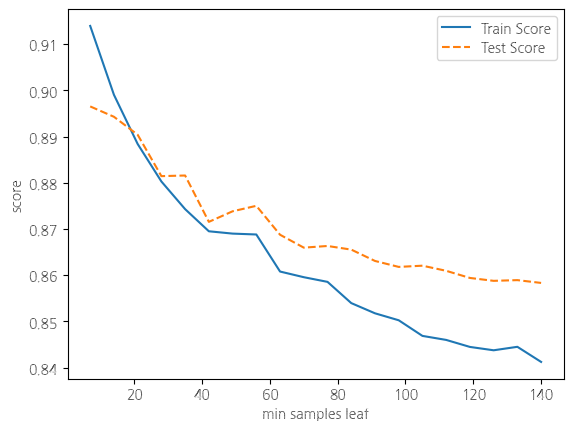

In [57]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
plt.show()

훈련점수는 잎사귀 수가 증가할수록 점차 낮아지며 140에 도달했을 때 0.841로 감소된다.
이는 갯수에 포함된 샘플 수가 많아질수록 데이터를 덜 세부적으로 학습하면서 과적합이 줄어들고 있다고 판단된다.
\
테스트 점수는 20에서 100사이 구간에서는 약간의 변동을 보이면서 안정적으로 유지된다. 100 이상일때는 테스트 점수가 조금씩 감소하는 경향이 보인다.
\
결론으론 값을 35에서 70사이로 설정하는 것이 테스트 점수와 훈련 점수의 차이가 적고 테스트 점수도 높은 수준으로 안정적이다.
\
그러므로 67정도를 선택

In [63]:
train_score = []; test_score = []
para_split = [n_split * 20 for n_split in range(2, 18)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 180, min_samples_leaf = 67,
                                   min_samples_split = v_min_samples_split)
    gb.fit(car_train_x, car_train_y)
    train_score.append(gb.score(car_train_x, car_train_y))
    test_score.append(gb.score(car_test_x, car_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,40,0.859,0.868
1,60,0.859,0.868
2,80,0.859,0.868
3,100,0.859,0.868
4,120,0.859,0.868
5,140,0.859,0.868
6,160,0.858,0.868
7,180,0.859,0.867
8,200,0.859,0.868
9,220,0.858,0.868


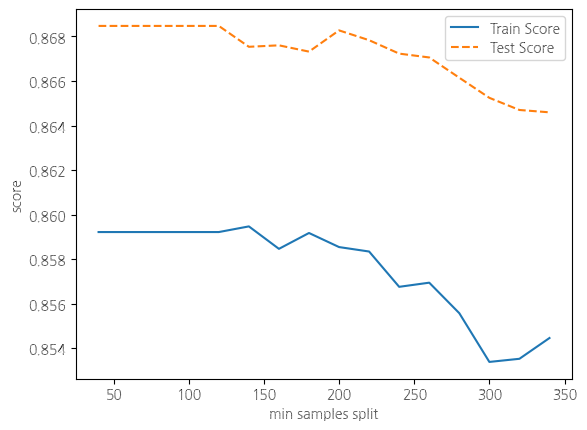

In [64]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()
plt.show()

40에서 140까지 훈련 점수와 테스트 점수가 변하지 않고 일관되게 유지되므로 40을 선택

In [69]:
# 170 Page
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(4, 16)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 180, min_samples_leaf = 67,
                                   min_samples_split = 40, max_depth = v_max_depth)
    gb.fit(car_train_x, car_train_y)
    train_score.append(gb.score(car_train_x, car_train_y))
    test_score.append(gb.score(car_test_x, car_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,4,0.871,0.868
1,5,0.877,0.869
2,6,0.877,0.866
3,7,0.880,0.866
4,8,0.883,0.867
5,9,0.885,0.868
6,10,0.887,0.868
7,11,0.889,0.869
8,12,0.890,0.869
9,13,0.891,0.870


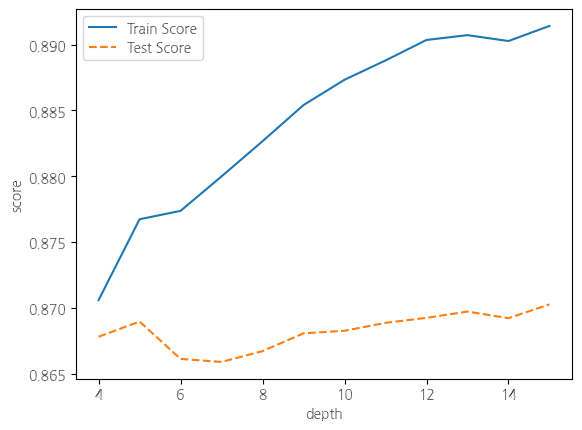

In [70]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()
plt.show()

훈련 점수는 깊이가 깊어질수록 증가하지만, 테스트 점수는 13이후로 거의 변화하지 않고 일정하게 유지됨
\
깊이 13과 15에서 테스트 점수가 가장 높고, 훈련 점수도 높지만 과적합 가능성이 커짐
\
그러므로 10을 고름

In [71]:
train_score = []; test_score = []
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 180, min_samples_leaf = 67,
                                   min_samples_split = 40, max_depth = 10, learning_rate = v_learning_rate)
    gb.fit(car_train_x, car_train_y)
    train_score.append(gb.score(car_train_x, car_train_y))
    test_score.append(gb.score(car_test_x, car_test_y))

df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.887,0.868
1,0.2,0.918,0.870
2,0.3,0.934,0.875
3,0.4,0.945,0.872
4,0.5,0.956,0.870
5,0.6,0.961,0.866
6,0.7,0.969,0.862
7,0.8,0.970,0.862
8,0.9,0.976,0.860


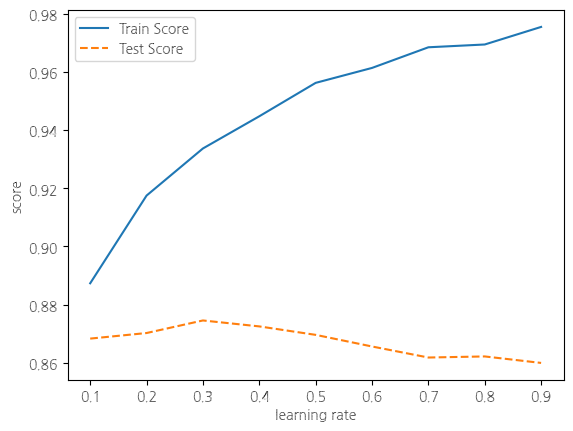

In [72]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()
plt.show()

테스트 점수는 0.3일때 최고치이며 값이 증가될수록 훈련 점수는 상승하지만 테스트 점수는 감소함
\
0.4 이상일 때 훈련 점수는 높아지지만 오히려 떨어지므로 과적합이 발생될 가능성이 있음
\
그러므로 0.3이 가장 적합한 선택이라고 판단됨

## 최종모델 설정

In [75]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 180, min_samples_leaf = 67,
                                   min_samples_split = 40, max_depth = 10, learning_rate = 0.3)
gb_final.fit(car_train_x, car_train_y)
print("Score on training set: {:.3f}".format(gb_final.score(car_train_x, car_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(car_test_x, car_test_y)))

Score on training set: 0.934
Score on test set: 0.875


In [77]:
test_pred =gb_final.predict(car_test_x)
print('test data의 실제값 : \n', car_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 4825     1532.96
2273     6361.78
3684     5028.11
4337     8584.58
4616     8967.82
1539     8737.87
5917    10562.09
4955     6361.78
3306    13030.16
498     52948.44
Name: Price, dtype: float64
test data의 예측값 : 
 [ 1704.21796107  7123.3519236   6141.20318938 10229.88951543
  9099.50359126  8510.03963338 15286.49742963  5733.3352261
  8005.40031343 44421.61126817]


In [78]:
v_feature_name = car_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,Power,0.699
0,Year,0.153
1,Kilometers_Driven,0.049
3,Engine,0.034
2,Mileage,0.025
23,Transmission_Manual,0.009
46,Brand_MERCEDES-BENZ,0.006
5,Seats,0.005
29,Brand_AUDI,0.003
21,Fuel_Type_Petrol,0.002


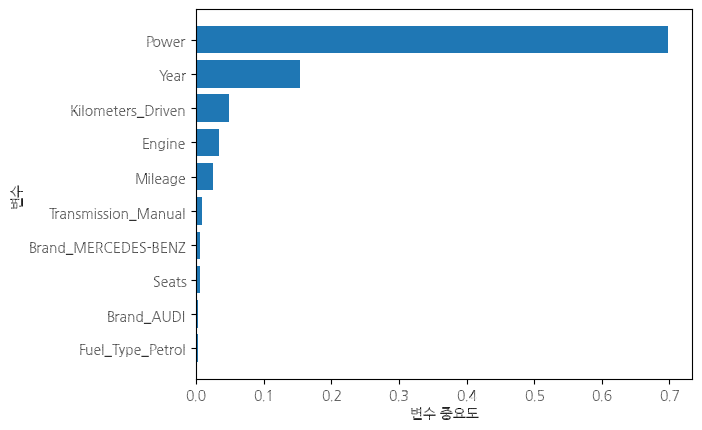

In [80]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
top_10_importance = df_importance.tail(10)  

coordinates = range(len(top_10_importance))
plt.barh(y=coordinates, width=top_10_importance["Importance"])
plt.yticks(coordinates, top_10_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()
